In [1]:
#Load Data set
import pandas as pd

In [4]:
file_path=r'C:\Users\ujjwa\Downloads\heart_disease.xlsx'


In [5]:
file_path

'C:\\Users\\ujjwa\\Downloads\\heart_disease.xlsx'

In [7]:
df=pd.read_excel(file_path)

In [8]:
df

,age,Age in years
0,Gender,"Gender ; Male - 1, Female -0"
1,cp,Chest pain type
2,trestbps,Resting blood pressure
3,chol,cholesterol measure
4,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...
5,restecg,"ecg observation at resting condition, -- Val..."
6,thalch,maximum heart rate achieved
7,exang,exercise induced angina
8,oldpeak,ST depression induced by exercise relative to ...
9,slope,the slope of the peak exercise ST segment


In [47]:
# Check for missing values
print(df.isnull().sum())

age             0
Age in years    0
dtype: int64


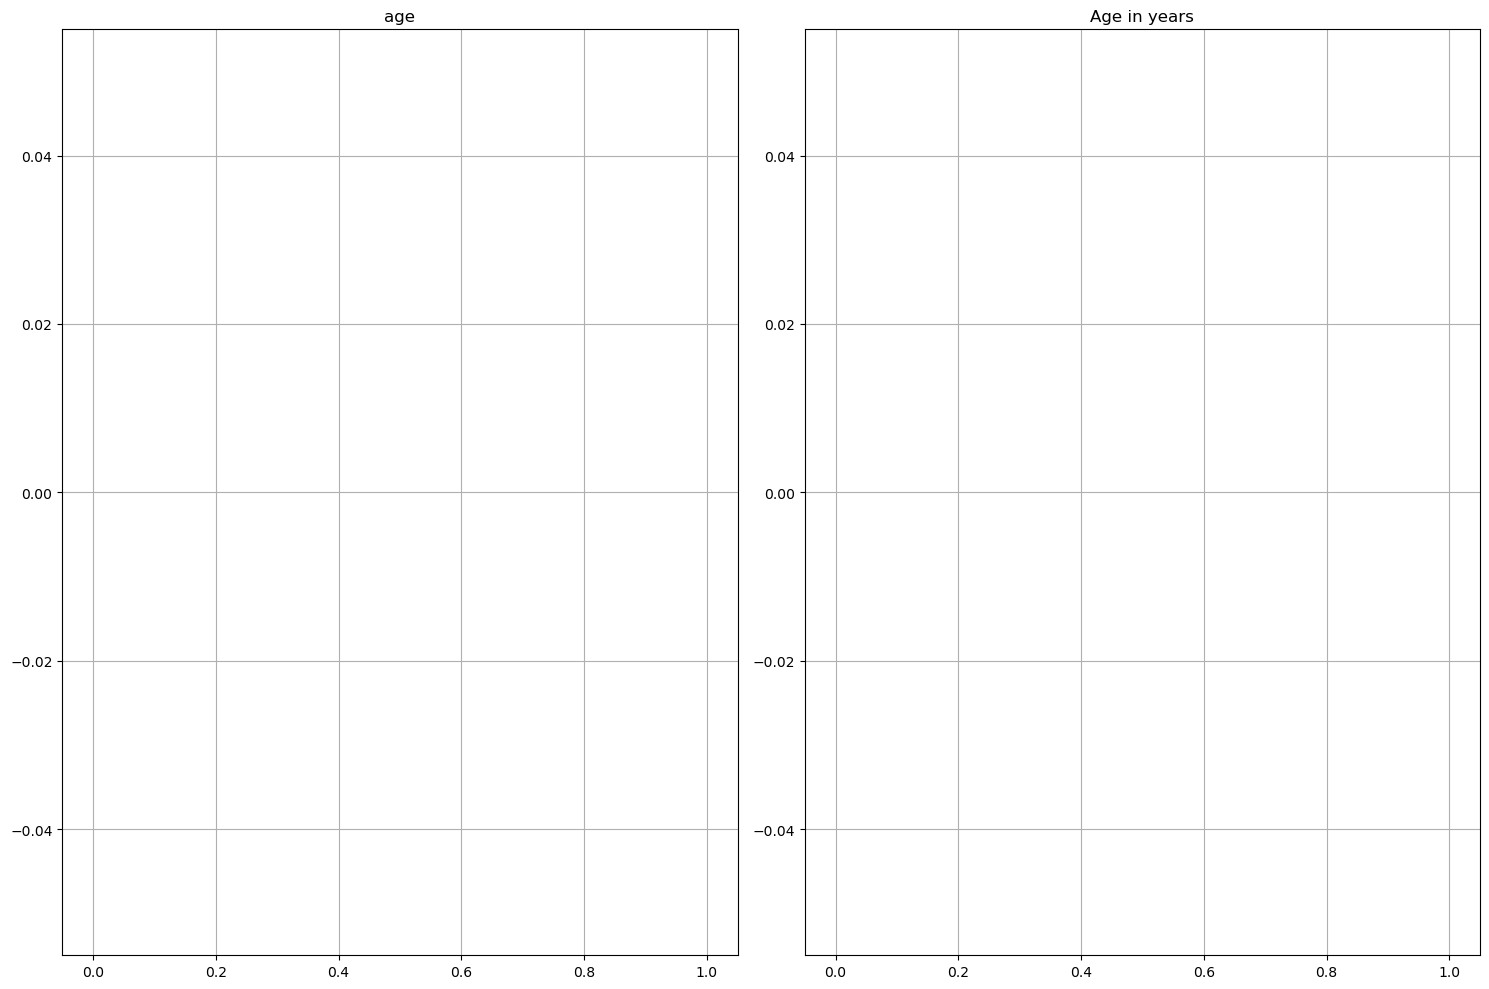

In [110]:
# Visualize the distribution of features
data.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

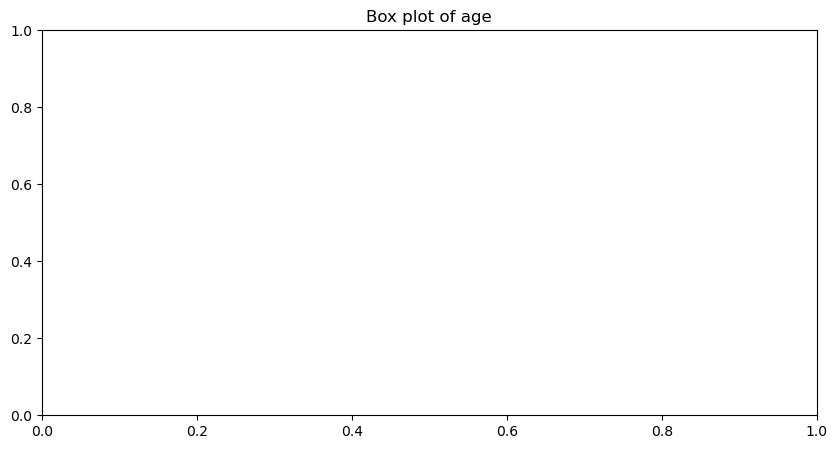

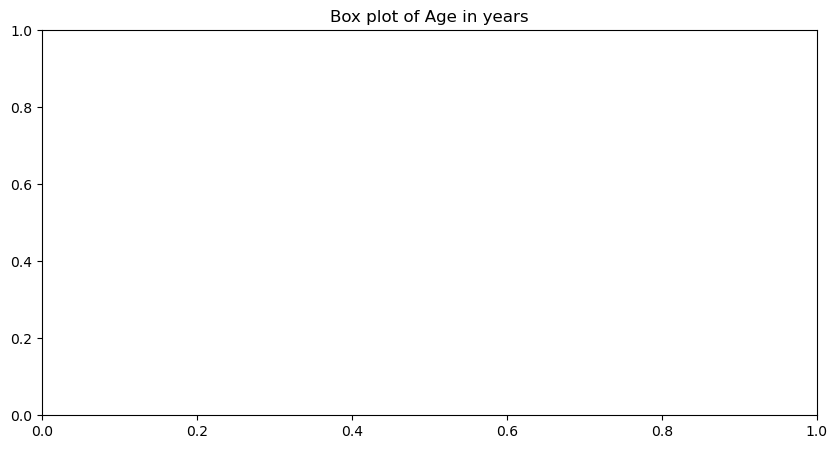

In [111]:
# Box plots to check for outliers
for column in data.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data[column])
    plt.title(f'Box plot of {column}')
    plt.show()

C:\Users\ujjwa\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\ujjwa\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


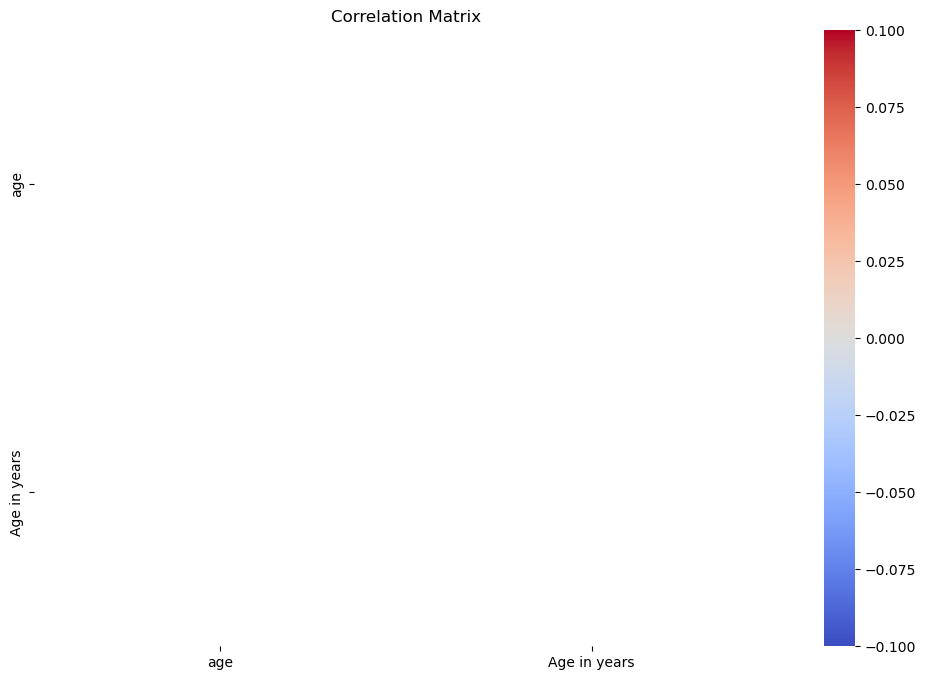

In [112]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [115]:
# Step 3: Feature Engineering
# Fill missing values (if any)
df.fillna(data.mean(), inplace=True)


In [117]:
print(df.columns)

Index(['age', 'Age in years'], dtype='object')


In [118]:
# Sample DataFrame
data = {
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Female'],
    'cp': ['Type1', 'Type2', 'Type1', 'Type2', 'Type1']
}
df = pd.DataFrame(data)


In [119]:
df 

,Gender,cp
0,Male,Type1
1,Female,Type2
2,Female,Type1
3,Male,Type2
4,Female,Type1


In [120]:
# Display the original DataFrame
print("Original DataFrame:")
print(df)


Original DataFrame:
   Gender     cp
0    Male  Type1
1  Female  Type2
2  Female  Type1
3    Male  Type2
4  Female  Type1


In [121]:
# Encode categorical variables
# Assuming 'Gender' and 'cp' are categorical
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})  # Example encoding
df['cp'] = df['cp'].astype('category').cat.codes  # Convert to category and encode

In [122]:
df['Gender'] 

0    1
1    0
2    0
3    1
4    0
Name: Gender, dtype: int64

In [123]:
df['cp'] 

0    0
1    1
2    0
3    1
4    0
Name: cp, dtype: int8

In [126]:
# Scale numerical columns
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=[np.number]).columns

In [127]:
numerical_cols

Index(['Gender', 'cp'], dtype='object')

In [128]:
# Use df instead of data
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [129]:
df[numerical_cols]

,Gender,cp
0,1.224745,-0.816497
1,-0.816497,1.224745
2,-0.816497,-0.816497
3,1.224745,1.224745
4,-0.816497,-0.816497


In [132]:
print(df.columns)


Index(['Gender', 'cp'], dtype='object')


In [137]:
# Step 4: Decision Tree Classification
# Separate features and target variable
df['num'] = (df['Gender'] + df['cp']) % 2  # Example logic to create a target variable
target_column = 'cp'  # Update the target column name
X = df.drop(target_column, axis=1)  # Drop the target column from features
y = df[target_column]  # Assign the target variable

In [142]:

# Display the features and target variable
print("\nFeatures (X):")
print(X)
print("\nTarget Variable (y):")
print(y)


Features (X):
     Gender       num
0  1.224745  0.408248
1 -0.816497  0.408248
2 -0.816497  0.367007
3  1.224745  0.449490
4 -0.816497  0.367007

Target Variable (y):
0   -0.816497
1    1.224745
2   -0.816497
3    1.224745
4   -0.816497
Name: cp, dtype: float64


In [138]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [143]:
X_train, X_test, y_train, y_test 

(     Gender       num
 2 -0.816497  0.367007
 0  1.224745  0.408248
 3  1.224745  0.449490,
      Gender       num
 1 -0.816497  0.408248
 4 -0.816497  0.367007,
 2   -0.816497
 0   -0.816497
 3    1.224745
 Name: cp, dtype: float64,
 1    1.224745
 4   -0.816497
 Name: cp, dtype: float64)

In [158]:
# Fit the Decision Tree Regressor

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


In [159]:
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [161]:
# Make predictions
# Make predictions with error handling
try:
    y_pred = dt_classifier.predict(X_test)  # Make predictions on the test set
    print("Predictions:", y_pred)
except AttributeError as e:
    print("Error during prediction:", e)
except Exception as e:
    print("An unexpected error occurred:", e)

Error during prediction: 'DecisionTreeClassifier' object has no attribute 'tree_'


In [164]:
# Evaluate the model
try:
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
except NameError as e:
    print("Error: y_pred is not defined. Ensure predictions are made successfully.")
except Exception as e:
    print("An unexpected error occurred during evaluation:", e)


Confusion Matrix:
Error: y_pred is not defined. Ensure predictions are made successfully.


In [174]:
#5. Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
# Create a parameter grid for GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


# Create a GridSearchCV object with cv set to the number of samples or less
n_splits = min(3, len(X_train))  # Set n_splits to the number of training samples or less
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=n_splits, scoring='accuracy')


In [175]:
grid_search

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [180]:
y_train = y_train.ravel()  # This ensures y_train is a 1D array


C:\Users\ujjwa\AppData\Local\Temp\ipykernel_3904\2520888722.py:1: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_train = y_train.ravel()  # This ensures y_train is a 1D array


In [181]:
y_train

array([-0.81649658, -0.81649658,  1.22474487])

In [182]:
from sklearn.tree import DecisionTreeRegressor

# Define the parameter grid for regression (similar to classification)
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'criterion': ['mse', 'friedman_mse']  # For regression, use 'mse' or 'friedman_mse'
}

# Create a GridSearchCV object for regression
grid_search = GridSearchCV(
    DecisionTreeRegressor(random_state=42),  # Use Regressor for regression task
    param_grid,
    cv=3,  # 3-fold cross-validation (or use LeaveOneOut() if necessary)
    scoring='neg_mean_squared_error',  # Use an appropriate scoring for regression
    n_jobs=-1,  # Use all available CPUs
    verbose=1  # Display progress
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Output the best parameters found by GridSearchCV
print("Best parameters found: ", grid_search.best_params_)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best parameters found:  {'criterion': 'friedman_mse', 'max_depth': None, 'min_samples_split': 5}


C:\Users\ujjwa\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
36 fits failed out of a total of 72.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ujjwa\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ujjwa\anaconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\ujjwa\anaconda3\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\ujjwa\anaconda3\Lib\site-packages\

In [185]:
#6. Model Evaluation and Analysis
# Evaluate the best model
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred_best = best_model.predict(X_test)

# Check if it's a classification or regression task
if len(set(y_test)) <= 10 and y_test.dtype != float:  # Classification task (discrete classes)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
    print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
else:  # Regression task (continuous values)
    print("Predictions (regression):\n", y_pred_best)
    print("Mean Squared Error: ", mean_squared_error(y_test, y_pred_best))
    print("R-squared: ", r2_score(y_test, y_pred_best))



Predictions (regression):
 [-0.13608276 -0.13608276]
Mean Squared Error:  1.1574074074074074
R-squared:  -0.1111111111111116
